In [2]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


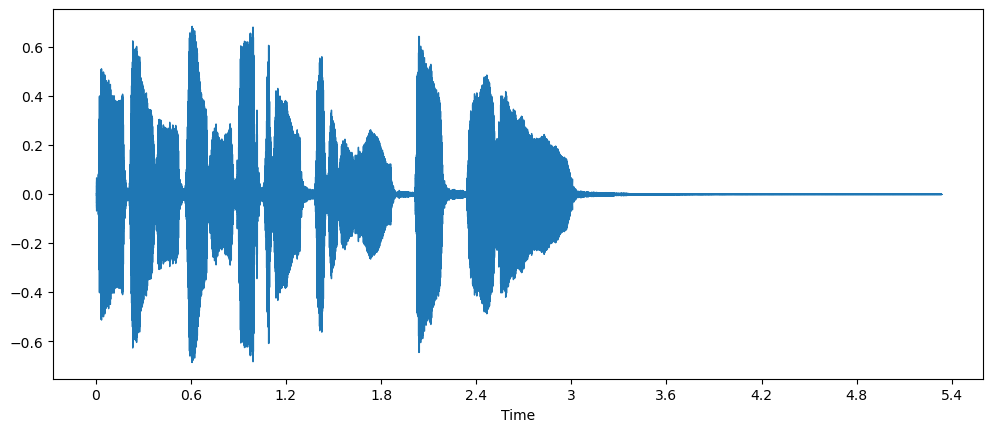

In [3]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

This plots the amplitude of the signal on the y-axis and time along the x-axis. In other words, each point corresponds to a single sample value that was taken when this sound was sampled. Also note that librosa returns the audio as floating-point values already, and that the amplitude values are indeed within the [-1.0, 1.0] range.

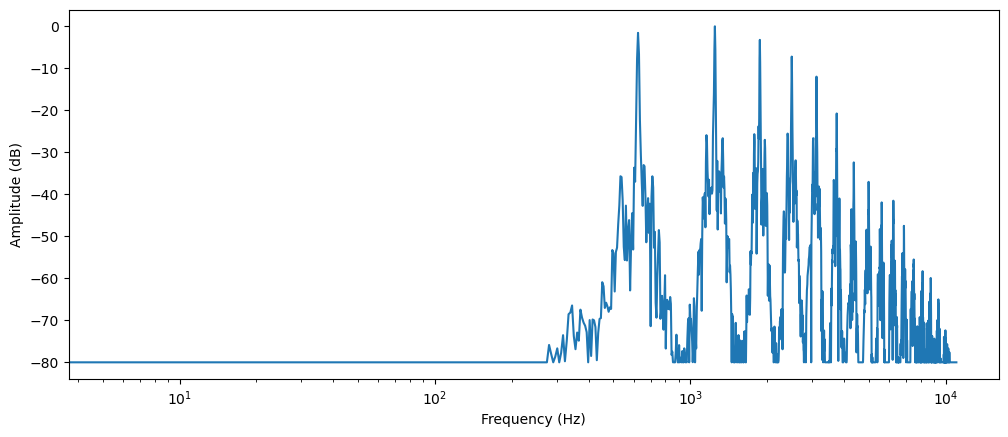

In [4]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")


This plots the strength of the various frequency components that are present in this audio segment. The frequency values are on the x-axis, usually plotted on a logarithmic scale, while their amplitudes are on the y-axis.

The frequency spectrum that we plotted shows several peaks. These peaks correspond to the harmonics of the note that’s being played, with the higher harmonics being quieter. Since the first peak is at around 620 Hz, this is the frequency spectrum of an E♭ note.